In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56423_R')

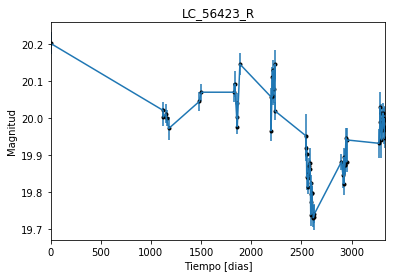

In [2]:
data = np.genfromtxt('LC_56423_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56423_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

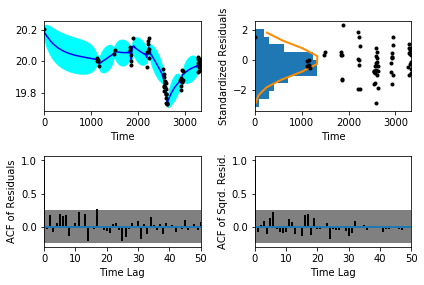

In [5]:
sample.assess_fit()

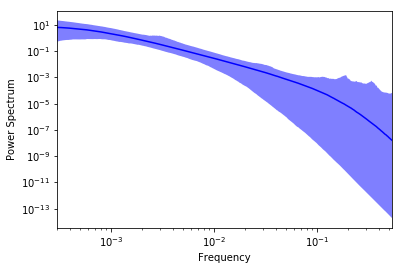

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56423_R')

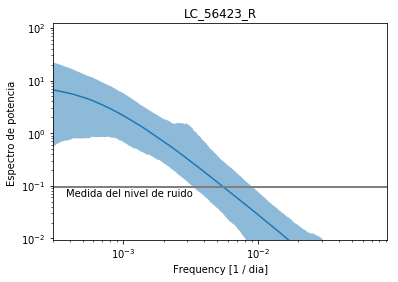

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56423_R')

Text(0.5,1,'Prediccion , valor esperado LC_56423_R')

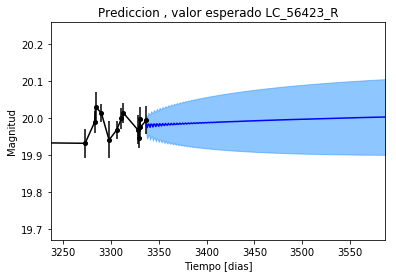

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56423_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56423_R')

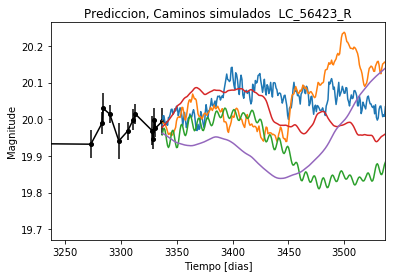

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56423_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56423_R')

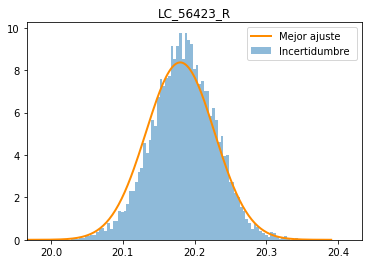

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56423_R')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_R')

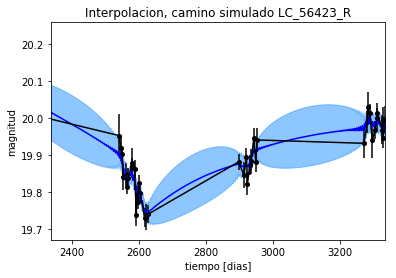

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_R')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_R')

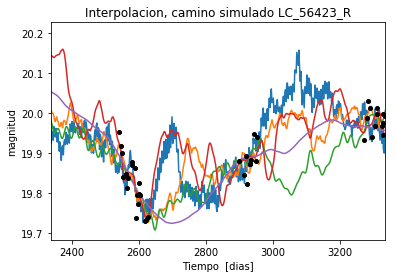

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 300.752728662
Median: 0.0232258484555
Standard deviation: 0.198707347903
68% credibility interval: [ 0.00375654  0.20071931]
95% credibility interval: [  6.19712245e-04   7.56016954e-01]
99% credibility interval: [  3.60704082e-04   1.01101802e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 624.524670367
Median: 0.0139086896342
Standard deviation: 0.106066794208
68% credibility interval: [ 0.00145652  0.08196803]
95% credibility interval: [  3.70055003e-04   3.91569688e-01]
99% credibility interval: [  3.13691549e-04   7.08961306e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 522.713376437
Median: 0.0927988986815
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 971.655374349
Median: 129.998680543
Standard deviation: 1.86151482212
68% credibility interval: [ 127.77703537  131.32409263]
95% credibility interval: [ 125.11470445  132.2060333 ]
99% credibility interval: [ 123.32262958  132.67890358]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 695.231912243
Median: 1.54674901507
Standard deviation: 2.49749757184
68% credibility interval: [ 0.27496705  5.01733868]
95% credibility interval: [ 0.06748249  8.87547059]
99% credibility interval: [  0.02415996  11.28181709]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 454.465556933
Median: 2.77558001149
Standard deviation: 12.2560373423
68% credibility interval: [  0.23836985  18.70057957]
95% credibility interval: [  2.34341047e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4484.92301956
Median: 8.92691535881e-31
Standard deviation: 1.6185319984e+57
68% credibility interval: [  7.81759026e-65   6.34486031e+00]
95% credibility interval: [  3.06736356e-96   2.72572000e+32]
99% credibility interval: [  2.65602521e-99   1.11525773e+45]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1063.00358467
Median: 20.0155141215
Standard deviation: 0.0603558391206
68% credibility interval: [ 19.9656044   20.07208009]
95% credibility interval: [ 19.90488241  20.15304683]
99% credibility interval: [ 19.86236276  20.20937231]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 2104.91197273
Median: 0.166176062376
Standard deviation: 0.290672787732
68% credibility interval: [ 0.          0.61511981]
95% credibility interval: [ 0.          0.99044837]
99% credibility interval: [ 0.          1.04823701]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 2104.91197273
Median: 0.166176062376
Standard deviation: 0.290672787732
68% credibility interval: [ 0.          0.61511981]
95% credibility interval: [ 0.          0.99044837]
99% credibility interval: [ 0.          1.04823701]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 258.698624922
Median: 0.0
Standard deviation: 0.000473997795715
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 971.655374349
Median: 129.998680543
Standard deviation: 1.86151482212
68% credibility interval: [ 127.77703537  131.32409263]
95% credibility interval: [ 125.11470445  132.2060333 ]
99% credibility interval: [ 123.32262958  132.67890358]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3960.45427809
Median: 0.0156360074375
Standard deviation: 0.0106953312681
68% credibility interval: [ 0.01021393  0.02589251]
95% credibility interval: [ 0.00703183  0.04290866]
99% credibility interval: [ 0.00546384  0.06153562]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1041.70529317
Median: 1.14902074896
Standard deviation: 0.220502339394
68% credibility interval: [ 0.95450263  1.38967065]
95% credibility interval: [ 0.79747302  1.65522375]
99% credibility interval: [ 0.71358769  1.84589662]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 690.986879261
Median: 0.0059789721475
Standard deviation: 0.268395750622
68% credibility interval: [  5.03280884e-06   1.27320140e-01]
95% credibility interval: [  8.50619564e-35   8.29751815e-01]
99% credibility interval: [  6.74427816e-49   1.76022399e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 300.752728662
Median: (-0.145932309762-6.58626737042j)
Standard deviation: 2.21231730594
68% credibility interval: [-1.26115659+0.j         -0.02360307-2.00973091j]
95% credibility interval: [ -4.75019462e+00+0.j          -3.89376687e-03-1.10334097j]
99% credibility interval: [ -6.35241358e+00+0.j          -2.26637059e-03-0.61584237j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 624.524670367
Median: (-0.0873908743516+0.838569222472j)
Standard deviation: 1.94414419237
68% credibility interval: [-0.51502035+6.02727701j -0.00915161+0.36054839j]
95% credibility interval: [ -2.46030491e+00+0.14136166j  -2.32512416e-03+3.46016169j]
99% credibility interval: [ -4.45453526e+00+4.24002767j  -1.97098213e-03+0.j        ]
Post